<a href="https://colab.research.google.com/github/laurindodumba/Hackaton-Ciencia-de-Dados/blob/main/LAURINDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mobility Prediction Hackathon Starter Notebook
This is a simple starter notebook to help you get started for the hackathon



In [ ]:
%%capture
# Install relevant libraries
!pip install geopandas folium

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import random
import os
from tqdm.notebook import tqdm
import ast

import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import LineString
import folium

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set seed for reproducability
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)


## Loading and previewing data

In [ ]:
DATA_PATH = ''
# Load files
train = pd.read_csv(os.path.join(DATA_PATH, 'Train.csv'))
test = pd.read_csv(os.path.join(DATA_PATH, 'Test.csv'))
#samplesubmission = pd.read_csv(os.path.join(DATA_PATH, 'SampleSubmission.csv'))
graph_df = pd.read_csv(os.path.join(DATA_PATH, 'Graph.csv'))

# Preview train dataset
train.head()

ID  \
0   17260044209298121808_X_last_weekday_X_morning_rush_hour   
1   1209619092996751600_X_first_holiday_X_evening_rush_hour   
2   2167486082359030275_X_other_weekday_X_evening_rush_hour   
3  13847074745002592180_X_first_holiday_X_morning_rush_hour   
4    15159993197349601575_X_lbo_weekday_X_evening_rush_hour   

          persistent_id            day    prediction_type  count_norm_00_0_  \
0  17260044209298121808   last_weekday  morning_rush_hour           0.00001   
1   1209619092996751600  first_holiday  evening_rush_hour               NaN   
2   2167486082359030275  other_weekday  evening_rush_hour               NaN   
3  13847074745002592180  first_holiday  morning_rush_hour           0.00074   
4  15159993197349601575    lbo_weekday  evening_rush_hour               NaN   

   count_norm_00_1_  count_norm_00_2_  count_norm_00_3_  count_norm_01_0_  \
0           0.00001           0.00003               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3           0.00057           0.00063           0.00043           0.00051   
4               NaN               NaN               NaN               NaN   

   count_norm_01_1_  count_norm_01_2_  count_norm_01_3_  count_norm_02_0_  \
0               NaN               NaN           0.00002               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3           0.00049           0.00035           0.00034           0.00058   
4               NaN               NaN               NaN               NaN   

   count_norm_02_1_  count_norm_02_2_  count_norm_02_3_  count_norm_03_0_  \
0           0.00001               NaN           0.00001               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3           0.00050           0.00040           0.00041           0.00036   
4               NaN               NaN               NaN               NaN   

   count_norm_03_1_  count_norm_03_2_  count_norm_03_3_  count_norm_04_0_  \
0               NaN           0.00002               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3           0.00036           0.00029           0.00026           0.00026   
4               NaN               NaN               NaN               NaN   

   count_norm_04_1_  count_norm_04_2_  count_norm_04_3_  count_norm_05_0_  \
0               NaN           0.00000           0.00000               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3           0.00029           0.00022           0.00019           0.00023   
4               NaN               NaN               NaN               NaN   

   count_norm_05_1_  count_norm_07_2_  count_norm_07_3_  count_norm_08_0_  \
0           0.00002               NaN               NaN               NaN   
1               NaN           0.00044           0.00041           0.00046   
2               NaN           0.00024           0.00019           0.00024   
3           0.00013               NaN               NaN               NaN   
4               NaN           0.00030           0.00028           0.00041   

   count_norm_08_1_  count_norm_08_2_  count_norm_08_3_  count_norm_09_0_  \
0               NaN               NaN               NaN               NaN   
1           0.00040           0.00042           0.00048           0.00050   
2           0.00029           0.00027           0.00041           0.00044   
3               NaN               NaN               NaN               NaN   
4           0.00030           0.00032   

In [ ]:
test.head()

ID  \
0   2275765177899682227_X_other_weekday_X_evening_rush_hour   
1  9245371497480994939_X_second_weekday_X_morning_rush_hour   
2    16610467146527913538_X_lbo_weekday_X_morning_rush_hour   
3   1330894880963821755_X_first_holiday_X_evening_rush_hour   
4  9985744433348563973_X_second_weekday_X_evening_rush_hour   

          persistent_id             day    prediction_type  count_norm_00_0_  \
0   2275765177899682227   other_weekday  evening_rush_hour               NaN   
1   9245371497480994939  second_weekday  morning_rush_hour           0.00001   
2  16610467146527913538     lbo_weekday  morning_rush_hour           0.00068   
3   1330894880963821755   first_holiday  evening_rush_hour               NaN   
4   9985744433348563973  second_weekday  evening_rush_hour               NaN   

   count_norm_00_1_  count_norm_00_2_  count_norm_00_3_  count_norm_01_0_  \
0               NaN               NaN               NaN               NaN   
1           0.00001               NaN           0.00004               NaN   
2           0.00044           0.00058           0.00047           0.00030   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   count_norm_01_1_  count_norm_01_2_  count_norm_01_3_  count_norm_02_0_  \
0               NaN               NaN               NaN               NaN   
1               NaN           0.00000               NaN               NaN   
2           0.00035           0.00028           0.00021           0.00020   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   count_norm_02_1_  count_norm_02_2_  count_norm_02_3_  count_norm_03_0_  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2           0.00015           0.00010           0.00014           0.00017   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   count_norm_03_1_  count_norm_03_2_  count_norm_03_3_  count_norm_04_0_  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN           0.00002   
2           0.00006           0.00011           0.00011           0.00007   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   count_norm_04_1_  count_norm_04_2_  count_norm_04_3_  count_norm_05_0_  \
0               NaN               NaN               NaN               NaN   
1               NaN           0.00003               NaN           0.00001   
2           0.00012           0.00010           0.00017           0.00016   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   count_norm_05_1_  count_norm_07_2_  count_norm_07_3_  count_norm_08_0_  \
0               NaN           0.00063           0.00069           0.00064   
1               NaN               NaN               NaN               NaN   
2           0.00025               NaN               NaN               NaN   
3               NaN           0.00092           0.00066           0.00083   
4               NaN           0.00002           0.00004           0.00004   

   count_norm_08_1_  count_norm_08_2_  count_norm_08_3_  count_norm_09_0_  \
0           0.00090           0.00088           0.00116           0.00104   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3           0.00096           0.00071           0.00059           0.00094   
4           0.00003           0.00

In [ ]:
train.count()

ID                  32450
persistent_id       32450
day                 32450
prediction_type     32450
count_norm_00_0_    15172
count_norm_00_1_    14981
count_norm_00_2_    14758
count_norm_00_3_    14619
count_norm_01_0_    14530
count_norm_01_1_    14473
count_norm_01_2_    13954
count_norm_01_3_    13723
count_norm_02_0_    13613
count_norm_02_1_    13356
count_norm_02_2_    13153
count_norm_02_3_    13061
count_norm_03_0_    12991
count_norm_03_1_    12758
count_norm_03_2_    12605
count_norm_03_3_    12481
count_norm_04_0_    12357
count_norm_04_1_    12440
count_norm_04_2_    12862
count_norm_04_3_    13113
count_norm_05_0_    13599
count_norm_05_1_    14150
count_norm_07_2_    15687
count_norm_07_3_    15796
count_norm_08_0_    15820
count_norm_08_1_    15672
count_norm_08_2_    15621
count_norm_08_3_    15651
count_norm_09_0_    15703
count_norm_09_1_    15818
count_norm_09_2_    15779
count_norm_09_3_    15789
count_norm_10_0_    15752
count_norm_10_1_    15794
count_norm_1

In [ ]:
train.isnull().sum()

ID                      0
persistent_id           0
day                     0
prediction_type         0
count_norm_00_0_    17278
count_norm_00_1_    17469
count_norm_00_2_    17692
count_norm_00_3_    17831
count_norm_01_0_    17920
count_norm_01_1_    17977
count_norm_01_2_    18496
count_norm_01_3_    18727
count_norm_02_0_    18837
count_norm_02_1_    19094
count_norm_02_2_    19297
count_norm_02_3_    19389
count_norm_03_0_    19459
count_norm_03_1_    19692
count_norm_03_2_    19845
count_norm_03_3_    19969
count_norm_04_0_    20093
count_norm_04_1_    20010
count_norm_04_2_    19588
count_norm_04_3_    19337
count_norm_05_0_    18851
count_norm_05_1_    18300
count_norm_07_2_    16763
count_norm_07_3_    16654
count_norm_08_0_    16630
count_norm_08_1_    16778
count_norm_08_2_    16829
count_norm_08_3_    16799
count_norm_09_0_    16747
count_norm_09_1_    16632
count_norm_09_2_    16671
count_norm_09_3_    16661
count_norm_10_0_    16698
count_norm_10_1_    16656
count_norm_1

In [ ]:
train['ID'] = pd.to_numeric(train['ID'], errors='coerce')

In [ ]:
train['day'] = pd.to_numeric(train['day'], errors='coerce')

In [ ]:
train['prediction_type'] = pd.to_numeric(train['prediction_type'], errors='coerce')

In [ ]:
for mediana_coluna in train:
  coluna = train[mediana_coluna].median()
  train[mediana_coluna].fillna(coluna, inplace=True)

In [ ]:
train.isnull().sum()

ID                  32450
persistent_id           0
day                 32450
prediction_type     32450
count_norm_00_0_        0
count_norm_00_1_        0
count_norm_00_2_        0
count_norm_00_3_        0
count_norm_01_0_        0
count_norm_01_1_        0
count_norm_01_2_        0
count_norm_01_3_        0
count_norm_02_0_        0
count_norm_02_1_        0
count_norm_02_2_        0
count_norm_02_3_        0
count_norm_03_0_        0
count_norm_03_1_        0
count_norm_03_2_        0
count_norm_03_3_        0
count_norm_04_0_        0
count_norm_04_1_        0
count_norm_04_2_        0
count_norm_04_3_        0
count_norm_05_0_        0
count_norm_05_1_        0
count_norm_07_2_        0
count_norm_07_3_        0
count_norm_08_0_        0
count_norm_08_1_        0
count_norm_08_2_        0
count_norm_08_3_        0
count_norm_09_0_        0
count_norm_09_1_        0
count_norm_09_2_        0
count_norm_09_3_        0
count_norm_10_0_        0
count_norm_10_1_        0
count_norm_1

In [ ]:
train.count()

ID                      0
persistent_id       32450
day                     0
prediction_type         0
count_norm_00_0_    32450
count_norm_00_1_    32450
count_norm_00_2_    32450
count_norm_00_3_    32450
count_norm_01_0_    32450
count_norm_01_1_    32450
count_norm_01_2_    32450
count_norm_01_3_    32450
count_norm_02_0_    32450
count_norm_02_1_    32450
count_norm_02_2_    32450
count_norm_02_3_    32450
count_norm_03_0_    32450
count_norm_03_1_    32450
count_norm_03_2_    32450
count_norm_03_3_    32450
count_norm_04_0_    32450
count_norm_04_1_    32450
count_norm_04_2_    32450
count_norm_04_3_    32450
count_norm_05_0_    32450
count_norm_05_1_    32450
count_norm_07_2_    32450
count_norm_07_3_    32450
count_norm_08_0_    32450
count_norm_08_1_    32450
count_norm_08_2_    32450
count_norm_08_3_    32450
count_norm_09_0_    32450
count_norm_09_1_    32450
count_norm_09_2_    32450
count_norm_09_3_    32450
count_norm_10_0_    32450
count_norm_10_1_    32450
count_norm_1

In [ ]:
# Preview test dataset
test.head()

ID  \
0   2275765177899682227_X_other_weekday_X_evening_rush_hour   
1  9245371497480994939_X_second_weekday_X_morning_rush_hour   
2    16610467146527913538_X_lbo_weekday_X_morning_rush_hour   
3   1330894880963821755_X_first_holiday_X_evening_rush_hour   
4  9985744433348563973_X_second_weekday_X_evening_rush_hour   

          persistent_id             day    prediction_type  count_norm_00_0_  \
0   2275765177899682227   other_weekday  evening_rush_hour               NaN   
1   9245371497480994939  second_weekday  morning_rush_hour           0.00001   
2  16610467146527913538     lbo_weekday  morning_rush_hour           0.00068   
3   1330894880963821755   first_holiday  evening_rush_hour               NaN   
4   9985744433348563973  second_weekday  evening_rush_hour               NaN   

   count_norm_00_1_  count_norm_00_2_  count_norm_00_3_  count_norm_01_0_  \
0               NaN               NaN               NaN               NaN   
1           0.00001               NaN           0.00004               NaN   
2           0.00044           0.00058           0.00047           0.00030   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   count_norm_01_1_  count_norm_01_2_  count_norm_01_3_  count_norm_02_0_  \
0               NaN               NaN               NaN               NaN   
1               NaN           0.00000               NaN               NaN   
2           0.00035           0.00028           0.00021           0.00020   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   count_norm_02_1_  count_norm_02_2_  count_norm_02_3_  count_norm_03_0_  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2           0.00015           0.00010           0.00014           0.00017   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   count_norm_03_1_  count_norm_03_2_  count_norm_03_3_  count_norm_04_0_  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN           0.00002   
2           0.00006           0.00011           0.00011           0.00007   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   count_norm_04_1_  count_norm_04_2_  count_norm_04_3_  count_norm_05_0_  \
0               NaN               NaN               NaN               NaN   
1               NaN           0.00003               NaN           0.00001   
2           0.00012           0.00010           0.00017           0.00016   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   count_norm_05_1_  count_norm_07_2_  count_norm_07_3_  count_norm_08_0_  \
0               NaN           0.00063           0.00069           0.00064   
1               NaN               NaN               NaN               NaN   
2           0.00025               NaN               NaN               NaN   
3               NaN           0.00092           0.00066           0.00083   
4               NaN           0.00002           0.00004           0.00004   

   count_norm_08_1_  count_norm_08_2_  count_norm_08_3_  count_norm_09_0_  \
0           0.00090           0.00088           0.00116           0.00104   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3           0.00096           0.00071           0.00059           0.00094   
4           0.00003           0.00

In [ ]:
test.columns

Index(['ID', 'persistent_id', 'day', 'prediction_type', 'count_norm_00_0_',
       'count_norm_00_1_', 'count_norm_00_2_', 'count_norm_00_3_',
       'count_norm_01_0_', 'count_norm_01_1_',
       ...
       'speed_avg_21_2_', 'speed_avg_21_3_', 'speed_avg_22_0_',
       'speed_avg_22_1_', 'speed_avg_22_2_', 'speed_avg_22_3_',
       'speed_avg_23_0_', 'speed_avg_23_1_', 'speed_avg_23_2_',
       'speed_avg_23_3_'],
      dtype='object', length=164)

In [ ]:
calcular_media = [col for col in test.columns if col not in ['ID', 'persistent_id', 'day', 'prediction_type']]

for coluna in calcular_media:
    test[coluna].fillna(test[coluna].median(), inplace=True)

In [ ]:
test.count()

In [ ]:
test.head()

In [ ]:
test.isnull().sum()

In [ ]:
test.dtypes

In [ ]:
#Pré-Processing
#test['ID'] = pd.to_numeric(test['ID	'], errors='coerce')


In [ ]:
train.head()

In [ ]:
# test['persistent_id'] = pd.to_numeric(test['persistent_id'], errors='coerce')
# test['day'] = pd.to_numeric(test['day'], errors='coerce')
# test['prediction_type'] = pd.to_numeric(test['prediction_type'], errors='coerce')

In [ ]:
calcular = [col for col in train.columns if col not in ['ID', 'persistent_id', 'day', 'prediction_type']]

for colunas in calcular:
    train[colunas].fillna(train[colunas].median(), inplace=True)

In [ ]:
train.isnull().sum()

In [ ]:
train.head()

ID         persistent_id  day  prediction_type  count_norm_00_0_  \
0 NaN  17260044209298121808  NaN              NaN           0.00001   
1 NaN   1209619092996751600  NaN              NaN           0.00024   
2 NaN   2167486082359030275  NaN              NaN           0.00024   
3 NaN  13847074745002592180  NaN              NaN           0.00074   
4 NaN  15159993197349601575  NaN              NaN           0.00024   

   count_norm_00_1_  count_norm_00_2_  count_norm_00_3_  count_norm_01_0_  \
0           0.00001           0.00003           0.00017           0.00015   
1           0.00022           0.00020           0.00017           0.00015   
2           0.00022           0.00020           0.00017           0.00015   
3           0.00057           0.00063           0.00043           0.00051   
4           0.00022           0.00020           0.00017           0.00015   

   count_norm_01_1_  count_norm_01_2_  count_norm_01_3_  count_norm_02_0_  \
0           0.00013           0.00013           0.00002           0.00010   
1           0.00013           0.00013           0.00012           0.00010   
2           0.00013           0.00013           0.00012           0.00010   
3           0.00049           0.00035           0.00034           0.00058   
4           0.00013           0.00013           0.00012           0.00010   

   count_norm_02_1_  count_norm_02_2_  count_norm_02_3_  count_norm_03_0_  \
0           0.00001           0.00008           0.00001           0.00007   
1           0.00009           0.00008           0.00008           0.00007   
2           0.00009           0.00008           0.00008           0.00007   
3           0.00050           0.00040           0.00041           0.00036   
4           0.00009           0.00008           0.00008           0.00007   

   count_norm_03_1_  count_norm_03_2_  count_norm_03_3_  count_norm_04_0_  \
0           0.00007           0.00002           0.00006           0.00006   
1           0.00007           0.00006           0.00006           0.00006   
2           0.00007           0.00006           0.00006           0.00006   
3           0.00036           0.00029           0.00026           0.00026   
4           0.00007           0.00006           0.00006           0.00006   

   count_norm_04_1_  count_norm_04_2_  count_norm_04_3_  count_norm_05_0_  \
0           0.00006           0.00000           0.00000           0.00007   
1           0.00006           0.00006           0.00006           0.00007   
2           0.00006           0.00006           0.00006           0.00007   
3           0.00029           0.00022           0.00019           0.00023   
4           0.00006           0.00006           0.00006           0.00007   

   count_norm_05_1_  count_norm_07_2_  count_norm_07_3_  count_norm_08_0_  \
0           0.00002           0.00027           0.00028           0.00030   
1           0.00008           0.00044           0.00041           0.00046   
2           0.00008           0.00024           0.00019           0.00024   
3           0.00013           0.00027           0.00028           0.00030   
4           0.00008           0.00030           0.00028           0.00041   

   count_norm_08_1_  count_norm_08_2_  count_norm_08_3_  count_norm_09_0_  \
0           0.00031           0.00032           0.00033           0.00034   
1           0.00040           0.00042           0.00048           0.00050   
2           0.00029           0.00027           0.00041           0.00044   
3           0.00031           0.00032           0.00033           0.00034   
4           0.00030           0.00032           0.00033           0.00042   

   count_norm_09_1_  count_norm_09_2_  count_norm_09_3_  count_norm_10_0_  \
0           0.00035           0.00036           0.00036           0.00037   
1           0.00046           0.00036           0.00050           0.00054   
2           0.00046           0.00048           0.00040           0.00047   
3           0.00035        

In [ ]:
# Preview sample submission file
#samplesubmission.head()

In [ ]:
# Preview graph data
graph_df.head()

can_bind_to_reverse_edge  category country_isocode  edge_type  \
0                     False         3              AO  NamedRoad   
1                     False         3              AO  NamedRoad   
2                     False         3              AO  NamedRoad   
3                     False         3              AO  NamedRoad   
4                     False         3              AO  NamedRoad   

   ends_with_crosswalk  ends_with_railroad_crossing  ends_with_toll_post  \
0                False                        False                False   
1                False                        False                False   
2                False                        False                False   
3                False                        False                False   
4                False                        False                False   

   ends_with_traffic_light  \
0                    False   
1                    False   
2                    False   
3                    False   
4                    False   

                                                                                                                                                                                     geometry  \
0  [[13.082673;-9.008803;];[13.082516;-9.008786;];[13.082364;-9.008761;];[13.082090;-9.008717;];[13.081817;-9.008669;];[13.081478;-9.008614;];[13.081137;-9.008559;];[13.080929;-9.008531;];]   
1                                                                                              [[13.082673;-9.008803;];[13.082861;-9.008814;];[13.083052;-9.008823;];[13.083208;-9.008826;];]   
2  [[13.080929;-9.008531;];[13.081137;-9.008559;];[13.081478;-9.008614;];[13.081817;-9.008669;];[13.082090;-9.008717;];[13.082364;-9.008761;];[13.082516;-9.008786;];[13.082673;-9.008803;];]   
3  [[13.080929;-9.008531;];[13.080824;-9.008517;];[13.080721;-9.008520;];[13.080620;-9.008521;];[13.080522;-9.008528;];[13.080444;-9.008536;];[13.080366;-9.008552;];[13.080246;-9.008576;];]   
4  [[13.080246;-9.008576;];[13.080366;-9.008552;];[13.080444;-9.008536;];[13.080522;-9.008528;];[13.080620;-9.008521;];[13.080721;-9.008520;];[13.080824;-9.008517;];[13.080929;-9.008531;];]   

   has_masstransit_lane  is_in_poor_condition  is_paved  is_residential  \
0                 False                 False      True           False   
1                 False                 False      True           False   
2                 False                 False      True           False   
3                 False                 False      True           False   
4                 False                 False      True           False   

   is_restricted_for_trucks  is_toll    length         persistent_id  \
0                     False    False 194.20000   6399254051574288822   
1                     False    False  58.90000    191128612226159479   
2                     False    False 194.20000  16472594619433714295   
3                     False    False  75.70000  17105338246958084043   
4                     False    False  75.70000   6578060580699092244   

             reverse_id  segments  speed_limit struct_type         timezone  \
0  16472594619433714295         7      8.33333        Road  Africa/Kinshasa   
1   6058922802191674762         3          NaN        Road  Africa/Kinshasa   
2   6399254051574288822         7          NaN        Road  Africa/Kinshasa   
3   6578060580699092244         7          NaN        Road  Africa/Kinshasa   
4  17105338246958084043         7          NaN        Road  Africa/Kinshasa   

                toponym  traffic_side  
0  Benfica-Palmeirinhas         False  
1  Benfica-Palmeirinhas         False  
2  Benfica-Palmeirinhas         False  
3  Benfica-Palmeirinhas         False  
4  Benfica-Palmeirinhas         False

In [ ]:
# Check size and shape of datasets
train.shape, test.shape #samplesubmission.shape

((32450, 165), (14048, 164))

In [ ]:
# Train to test sets ratio
(test.shape[0]) / (train.shape[0] + test.shape[0])

0.30212052131274464


## Statistical summaries

In [ ]:
# Train statistical summary
train.describe(include = 'all')

ID              persistent_id     day  prediction_type  \
count 0.00000                32450.00000 0.00000          0.00000   
mean      NaN  9197670268579627008.00000     NaN              NaN   
std       NaN  5430238637817029632.00000     NaN              NaN   
min       NaN      174649060204411.00000     NaN              NaN   
25%       NaN  4454121893678398464.00000     NaN              NaN   
50%       NaN  9068210539259713536.00000     NaN              NaN   
75%       NaN 14050812913792741376.00000     NaN              NaN   
max       NaN 18442387431145195520.00000     NaN              NaN   

       count_norm_00_0_  count_norm_00_1_  count_norm_00_2_  count_norm_00_3_  \
count       32450.00000       32450.00000       32450.00000       32450.00000   
mean            0.00031           0.00029           0.00026           0.00024   
std             0.00032           0.00030           0.00029           0.00027   
min             0.00000           0.00000           0.00000           0.00000   
25%             0.00024           0.00022           0.00020           0.00017   
50%             0.00024           0.00022           0.00020           0.00017   
75%             0.00024           0.00022           0.00020           0.00017   
max             0.00320           0.00284           0.00277           0.00274   

       count_norm_01_0_  count_norm_01_1_  count_norm_01_2_  count_norm_01_3_  \
count       32450.00000       32450.00000       32450.00000       32450.00000   
mean            0.00021           0.00018           0.00017           0.00016   
std             0.00023           0.00021           0.00020           0.00019   
min             0.00000           0.00000           0.00000           0.00000   
25%             0.00015           0.00013           0.00013           0.00012   
50%             0.00015           0.00013           0.00013           0.00012   
75%             0.00015           0.00013           0.00013           0.00012   
max             0.00254           0.00220           0.00227           0.00196   

       count_norm_02_0_  count_norm_02_1_  count_norm_02_2_  count_norm_02_3_  \
count       32450.00000       32450.00000       32450.00000       32450.00000   
mean            0.00014           0.00013           0.00012           0.00011   
std             0.00018           0.00017           0.00015           0.00015   
min             0.00000           0.00000           0.00000           0.00000   
25%             0.00010           0.00009           0.00008           0.00008   
50%             0.00010           0.00009           0.00008           0.00008   
75%             0.00010           0.00009           0.00008           0.00008   
max             0.00193           0.00193           0.00172           0.00155   

       count_norm_03_0_  count_norm_03_1_  count_norm_03_2_  count_norm_03_3_  \
count       32450.00000       32450.00000       32450.00000       32450.00000   
mean            0.00010           0.00010           0.00009           0.00009   
std             0.00015           0.00014           0.00013           0.00013   
min             0.00000           0.00000           0.00000           0.00000   
25%             0.00007           0.00007           0.00006           0.00006   
50%             0.00007           0.00007           0.00006           0.00006   
75%             0.00007           0.00007           0.00006           0.00006   
max             0.00173           0.00156           0.00142           0.00155   

       count_norm_04_0_  count_norm_04_1_  count_norm_04_2_  count_norm_04_3_  \
count       32450.00000       32450.00000       32450.00000       32450.00000   
mean            0.00009           0.00009           0.00008           0.00009   
std             0.00012           0.00011           0.00011           0.00011   
min             0.00000           0.00000           0.00000           0.00000   
25%             0.00006           0.00006           0.00006     

From the above statistical summary, we can deduce some of the following insights:
 - The train data provided has 32450 data points
 - There are 7 unique days in the dataset
 - There are a lot of missing values
 - The maximum target/speed is 29.91862

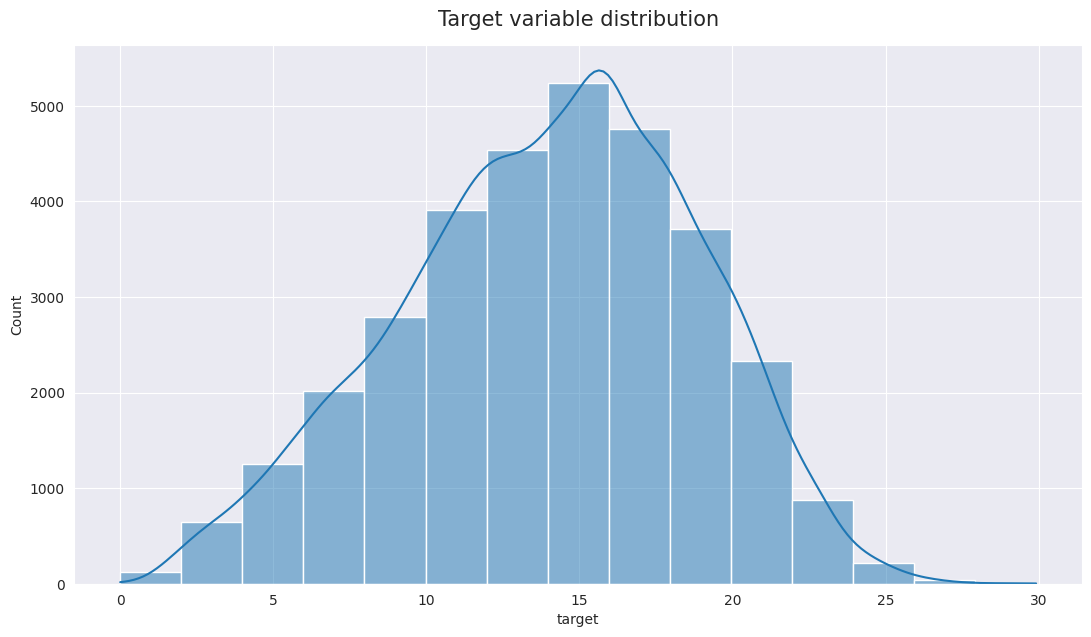

None

-0.2297513068532186

In [ ]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.target, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train.target.skew())

The target variable is appears to be normally distributed but has a skew of ~0.22




## Outliers


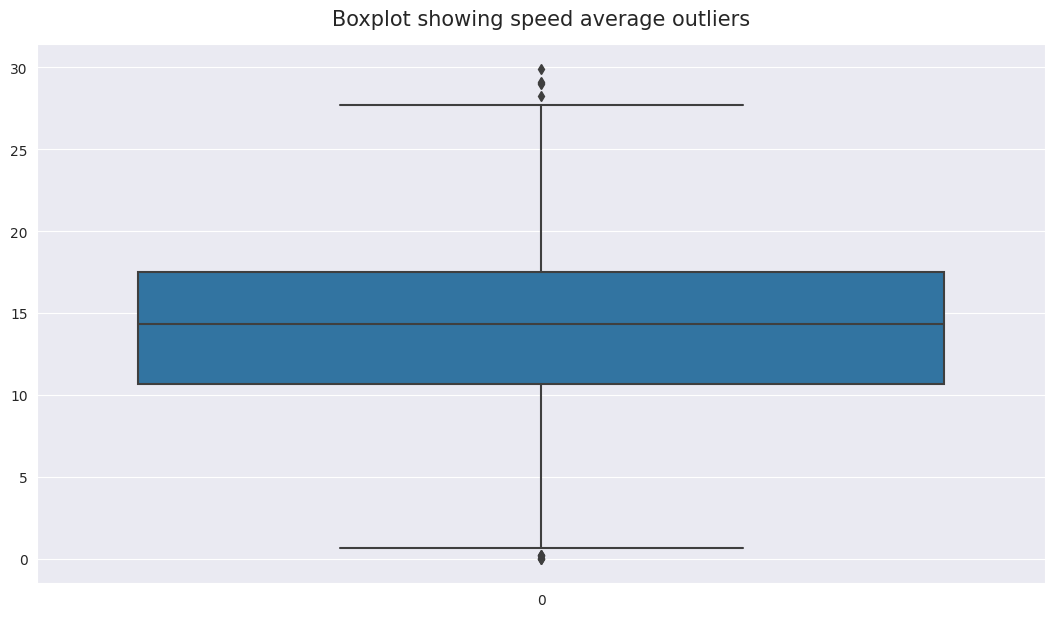

In [ ]:
# Plotting boxplot for speed average
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.boxplot(train.target)
plt.title('Boxplot showing speed average outliers', y = 1.02, fontsize = 15)
plt.show()

Outliers are those data points which differ significantly from other observations present in given dataset.

Suggestions on how to handle outliers:
 - Transforming the outliers by scaling - log transformation, box-cox transformation ...
 - Dropping outliers
 - Imputation by replacing outliers with mean, median ...



## Roads Visualisation

In [ ]:
# Create a geopandas df
# convert the geometry column to a tuple
graph_df.geometry = graph_df.geometry.apply(lambda x: ast.literal_eval(x.replace(';', ',').replace('[', '(').replace(']', ')')))

# Create LineString objects from the tuples of coordinates
lines = [LineString(coords) for coords in graph_df['geometry']]

# Create a GeoDataFrame with LineString geometry
gdf = gpd.GeoDataFrame(graph_df, geometry=lines)

# Preview
gdf.head(2)

can_bind_to_reverse_edge  category country_isocode  edge_type  \
0                     False         3              AO  NamedRoad   
1                     False         3              AO  NamedRoad   

   ends_with_crosswalk  ends_with_railroad_crossing  ends_with_toll_post  \
0                False                        False                False   
1                False                        False                False   

   ends_with_traffic_light  \
0                    False   
1                    False   

                                                                                                                                                              geometry  \
0  LINESTRING (13.08267 -9.00880, 13.08252 -9.00879, 13.08236 -9.00876, 13.08209 -9.00872, 13.08182 -9.00867, 13.08148 -9.00861, 13.08114 -9.00856, 13.08093 -9.00853)   
1                                                                              LINESTRING (13.08267 -9.00880, 13.08286 -9.00881, 13.08305 -9.00882, 13.08321 -9.00883)   

   has_masstransit_lane  is_in_poor_condition  is_paved  is_residential  \
0                 False                 False      True           False   
1                 False                 False      True           False   

   is_restricted_for_trucks  is_toll    length        persistent_id  \
0                     False    False 194.20000  6399254051574288822   
1                     False    False  58.90000   191128612226159479   

             reverse_id  segments  speed_limit struct_type         timezone  \
0  16472594619433714295         7      8.33333        Road  Africa/Kinshasa   
1   6058922802191674762         3          NaN        Road  Africa/Kinshasa   

                toponym  traffic_side  
0  Benfica-Palmeirinhas         False  
1  Benfica-Palmeirinhas         False

### Visualise all the road sections in the provided dataset

In [ ]:
# Create a Folium map centered at a specific location
map_center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
mymap = folium.Map(location=map_center, zoom_start=11)

# Iterate through the GeoDataFrame and add LineString objects to the map
for idx, row in gdf.iterrows():
    folium.GeoJson(row['geometry']).add_to(mymap)

# Display the map
mymap

### Visualise road sections in training and test datasets

In [ ]:
train_copy = train[['persistent_id', 'target']]
train_copy ['dataset'] = 'train'
test_copy = test[['persistent_id']]
test_copy ['dataset'] = 'test'
train_test = pd.concat([train_copy, test_copy])
new_gdf = gdf.merge(train_test[['persistent_id', 'target', 'dataset']], how = 'left', on = ['persistent_id'])
new_gdf.head(2)

can_bind_to_reverse_edge  category country_isocode  edge_type  \
0                     False         3              AO  NamedRoad   
1                     False         3              AO  NamedRoad   

   ends_with_crosswalk  ends_with_railroad_crossing  ends_with_toll_post  \
0                False                        False                False   
1                False                        False                False   

   ends_with_traffic_light  \
0                    False   
1                    False   

                                                                                                                                                              geometry  \
0  LINESTRING (13.08267 -9.00880, 13.08252 -9.00879, 13.08236 -9.00876, 13.08209 -9.00872, 13.08182 -9.00867, 13.08148 -9.00861, 13.08114 -9.00856, 13.08093 -9.00853)   
1                                                                              LINESTRING (13.08267 -9.00880, 13.08286 -9.00881, 13.08305 -9.00882, 13.08321 -9.00883)   

   has_masstransit_lane  is_in_poor_condition  is_paved  is_residential  \
0                 False                 False      True           False   
1                 False                 False      True           False   

   is_restricted_for_trucks  is_toll    length        persistent_id  \
0                     False    False 194.20000  6399254051574288822   
1                     False    False  58.90000   191128612226159479   

             reverse_id  segments  speed_limit struct_type         timezone  \
0  16472594619433714295         7      8.33333        Road  Africa/Kinshasa   
1   6058922802191674762         3          NaN        Road  Africa/Kinshasa   

                toponym  traffic_side  target dataset  
0  Benfica-Palmeirinhas         False     NaN     NaN  
1  Benfica-Palmeirinhas         False 8.69332   train

In [ ]:
# Preview roads in train
new_gdf.toponym.value_counts(normalize = True)

Avenida Comandante Fidel Castro         0.19974
Avenida Pedro de Castro Van-Dúnem Loy   0.11992
Estrada da Samba                        0.08084
Estrada de Cacuaco                      0.07922
Avenida Deolinda Rodrigues              0.06612
Avenida 21 de Janeiro                   0.05333
Benfica-Palmeirinhas                    0.04390
Via Expressa Golfe-Camama               0.04348
Estrada de Catete                       0.03597
Zango-Calumbo                           0.03395
Estrada do Futungo                      0.02434
Estrada do Zango-Calumbo                0.02376
Rua 21 de Janeiro                       0.02144
Avenida Revolução de Outubro            0.02132
Avenida Agostinho Neto                  0.01520
Avenida Ho Chi Minh                     0.01409
Avenida do 1º Congresso do MPLA         0.01291
Rua dos Heróis                          0.01180
Avenida Comandante Kima Kyenda          0.01115
Estrada do Golfe                        0.01113
Kifangondo-Funda                        

In [ ]:
# Visualise da_samba Road
da_samba = new_gdf[new_gdf.toponym == 'Ponte de Kifangondo']

# Create a Folium map centered at a specific location
map_center = [da_samba.geometry.centroid.y.mean(), da_samba.geometry.centroid.x.mean()]
mymap = folium.Map(location=map_center, zoom_start=20)

# Iterate through the GeoDataFrame and add LineString objects to the map
for idx, row in da_samba.iterrows():
    folium.GeoJson(row['geometry'], style_function=lambda feature: {'weight': 5}).add_to(mymap)

# Display the map
mymap

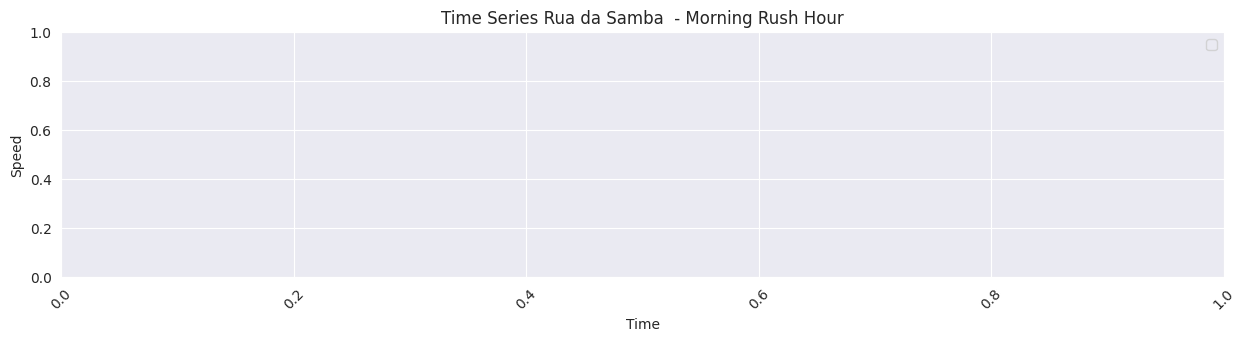

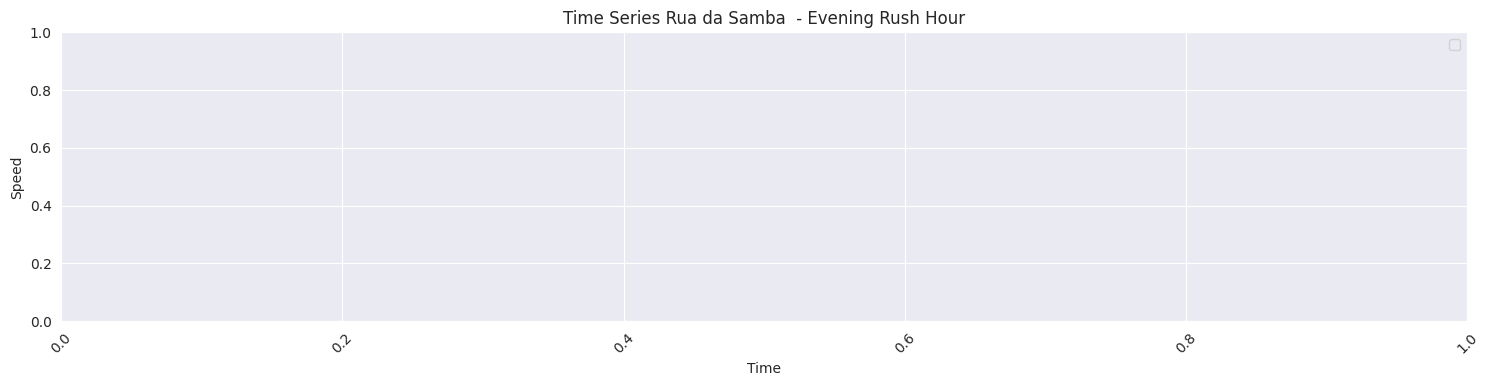

In [ ]:
train_graph = train.merge(graph_df, how = 'left', on = 'persistent_id')
Rua_da_Samba = train_graph[train_graph.toponym == 'Ponte de Kifangondo']

da_samba = Rua_da_Samba[Rua_da_Samba.day == 'other_holiday'][[x for x in Rua_da_Samba.columns if x.startswith('speed_avg')]].T.reset_index().iloc[:, :3]
#da_samba.columns = ['time', 'morning_rush', 'evening_rush']
da_samba

plt.figure(figsize=(15, 7))

plt.subplot(2, 1, 1)
#plt.plot(da_samba['time'], da_samba['morning_rush'], color='blue', label='Morning rush hour')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Time Series Rua da Samba  - Morning Rush Hour')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.figure(figsize=(15, 7))
plt.subplot(2, 1, 2)
#plt.plot(da_samba.iloc[22:62, :]['time'], da_samba.iloc[22:62, :]['evening_rush'], color='red', label='Evening rush hour')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Time Series Rua da Samba  - Evening Rush Hour')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


## Missing values and duplicates

In [ ]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(True, True)

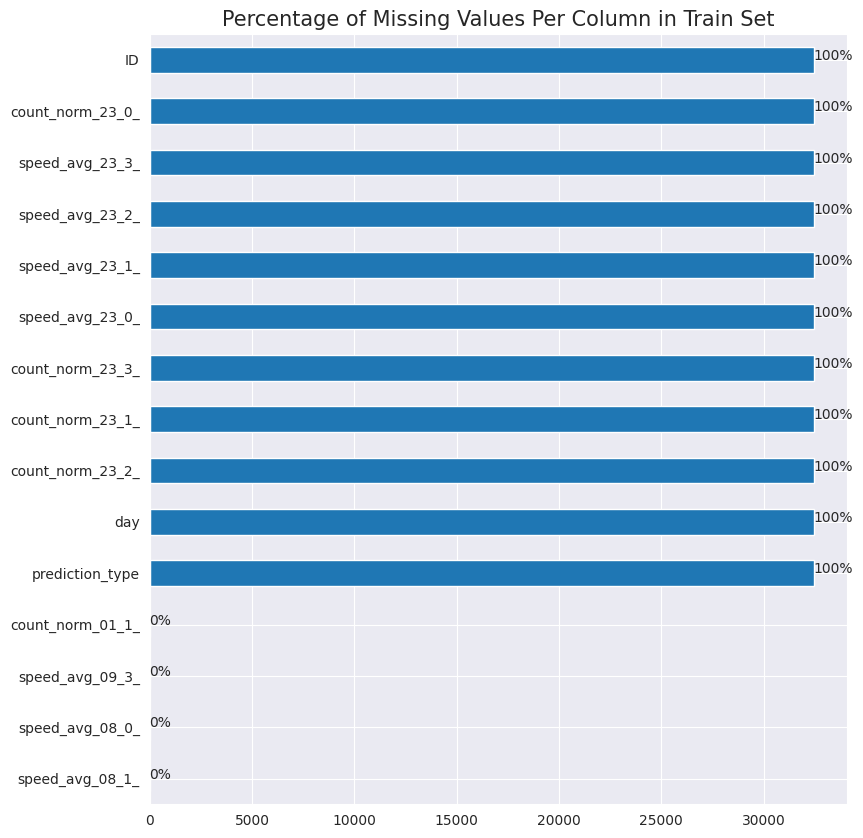

In [ ]:
# Plot missing values in train set
ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

Insights:
 - Most of the times there were no cars at midnight

Suggestions on how to handle missing values:
 - Fill in missing values with mode, mean, median..
 - Drop Missing datapoints with missing values
 - Fill in with a large number e.g -999999

In [ ]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)


## Correlations

In [ ]:
# Top 20 correlated features to the target
top20_corrs = abs(train.corr()['target']).sort_values(ascending = False).head(20)
top20_corrs

target            1.00000
speed_avg_17_0_   0.63203
speed_avg_16_3_   0.63072
speed_avg_17_1_   0.62985
speed_avg_16_2_   0.62555
speed_avg_16_1_   0.62398
speed_avg_16_0_   0.62015
speed_avg_15_2_   0.61015
speed_avg_19_2_   0.60671
speed_avg_15_3_   0.60650
speed_avg_15_1_   0.60187
speed_avg_14_3_   0.59724
speed_avg_15_0_   0.59663
speed_avg_14_1_   0.59380
speed_avg_14_2_   0.59186
speed_avg_14_0_   0.58987
speed_avg_13_2_   0.58779
speed_avg_13_1_   0.58713
speed_avg_13_0_   0.58529
speed_avg_19_3_   0.58374
Name: target, dtype: float64

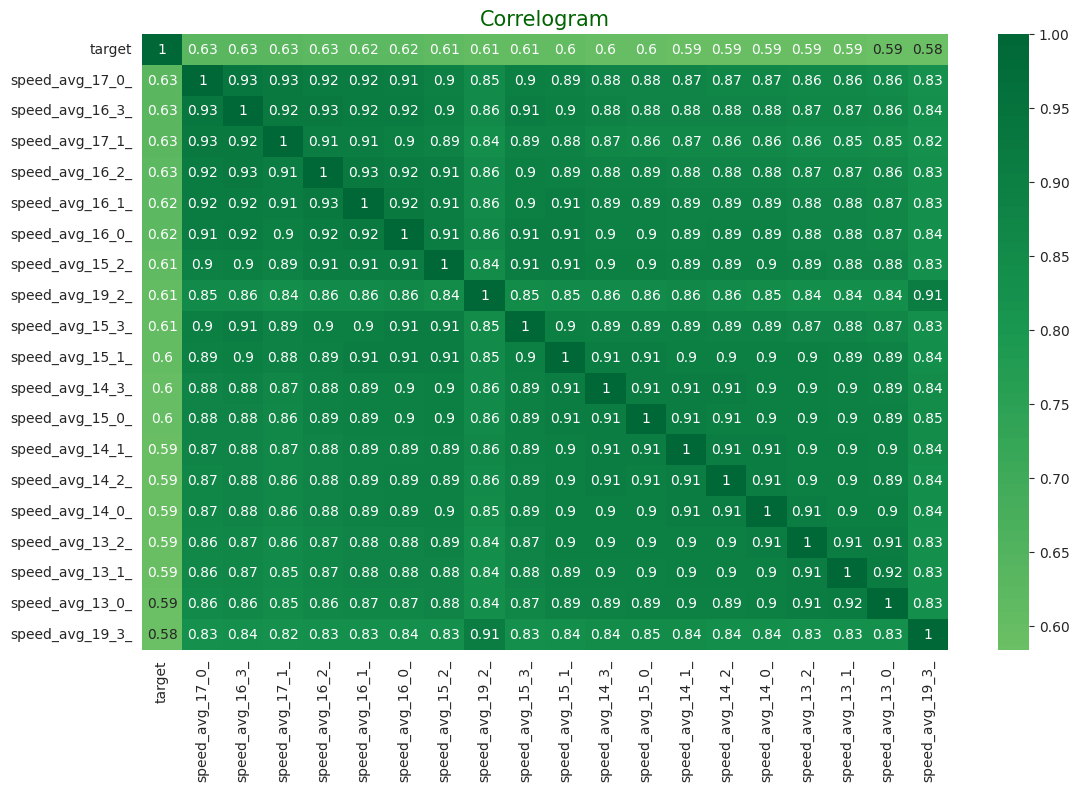

In [ ]:
# Quantify correlations between features
corr = train[list(top20_corrs.index)].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()


## Modelling

In [ ]:
# Selecting the independent variables and the target variable

X = train.drop(['ID', 'persistent_id', 'day', 'prediction_type', 'target'], axis = 1).fillna(0)
y = train.target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

# Instantiating the model
clf = RandomForestRegressor(random_state = SEED, n_jobs=-3)
# clf = LinearRegression()

clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE Score: {mean_squared_error(y_test, y_pred, squared=False)}') # 1.7721075972536378 #1.7776

RMSE Score: 1.7776066317199182


In [ ]:
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Create a simple dataset
# np.random.seed(42)
# X = np.random.rand(100, 1)  # One feature
# y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)  # Linear relationship with noise

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a linear regression model
# linear_model = LinearRegression()

# # Fit the model
# linear_model.fit(X_train, y_train)

# # Make predictions
# y_pred = linear_model.predict(X_test)

# # Measure the accuracy of the model
# rmse_score = mean_squared_error(y_test, y_pred, squared=False)
# print(f'RMSE Score: {rmse_score}')


In [ ]:
# from sklearn.model_selection import TimeSeriesSplit

# # Assuming train is sorted by time or you sort it by time before splitting
# splitter = TimeSeriesSplit(n_splits=2)  # You can adjust the number of splits

# for train_index, test_index in splitter.split(train):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     # Instantiate the model
#     clf = RandomForestRegressor(random_state=SEED, n_jobs=-1)

#     # Fit the model
#     clf.fit(X_train, y_train)

#     # Make predictions
#     y_pred = clf.predict(X_test)

#     # Measure the accuracy of the model
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     print(f'RMSE Score: {rmse}')



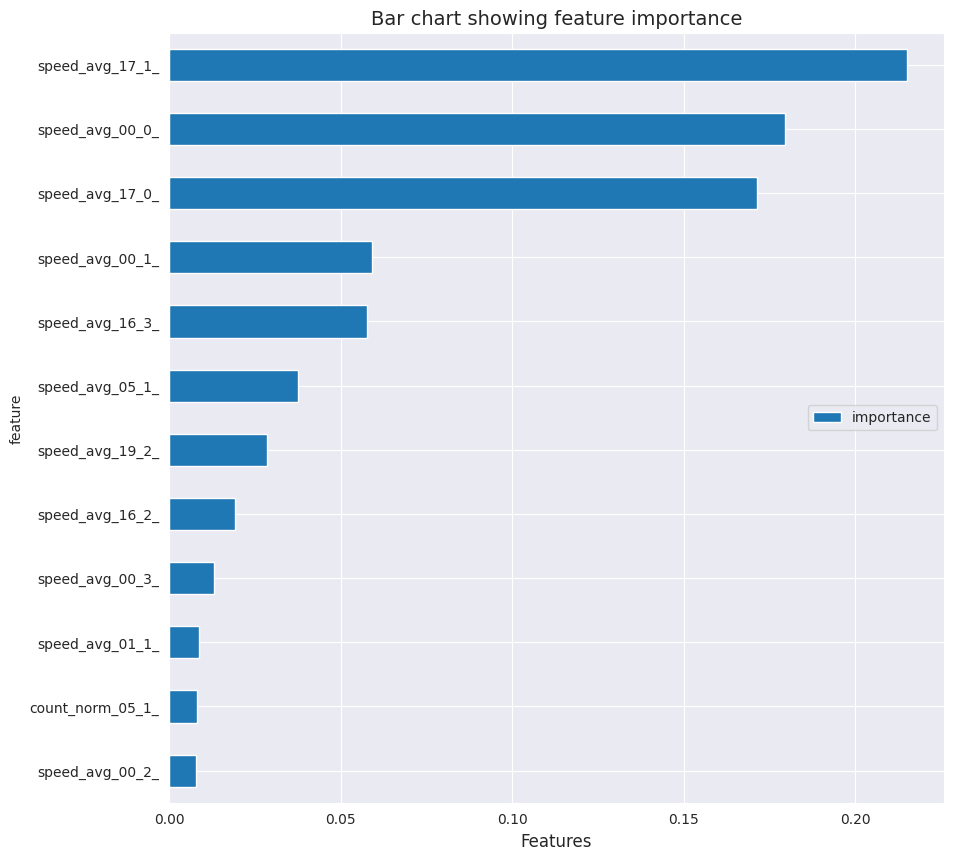

In [ ]:
# Feature importance
impo_df = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10))
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', fontsize = 14)
plt.xlabel('Features', fontsize = 12)
plt.show()


## Making predictions of the test set and creating a submission file

In [ ]:
# Make prediction on the test set
test_df = test.drop(['ID', 'persistent_id', 'day', 'prediction_type'], axis = 1).fillna(0)
predictions = clf.predict(test_df)

# # Create a submission file
sub_file = pd.DataFrame({'ID': test.ID, 'target': predictions})
sub_file.head()

ID   target
0   2275765177899682227_X_other_weekday_X_evening_rush_hour  8.97503
1  9245371497480994939_X_second_weekday_X_morning_rush_hour 12.35189
2    16610467146527913538_X_lbo_weekday_X_morning_rush_hour 13.77823
3   1330894880963821755_X_first_holiday_X_evening_rush_hour 10.39839
4  9985744433348563973_X_second_weekday_X_evening_rush_hour 11.80921

In [ ]:
# Create file
sub_file.to_csv('BaselineSubmission_13.csv', index = False) # Download subfile and submit to zindi for scoring

## ALL THE BEST AND HAVE FUN &#x1F60E;

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor

# # Selecting the independent variables and the target variable
# X = train.drop(['ID', 'persistent_id', 'day', 'prediction_type', 'target'], axis=1).fillna(0)
# y = train.target

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# # Instantiating the new model (GradientBoostingRegressor)
# clf = GradientBoostingRegressor(random_state=SEED)
# clf.fit(X_train, y_train)

# # Making predictions
# y_pred = clf.predict(X_test)

# # Measuring the accuracy of the model
# print(f'RMSE Score: {mean_squared_error(y_test, y_pred, squared=False)}')


In [ ]:
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Create a simple dataset
# np.random.seed(42)
# X = np.random.rand(100, 1)  # One feature
# y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)  # Linear relationship with noise

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a linear regression model
# linear_model = LinearRegression()

# # Fit the model
# linear_model.fit(X_train, y_train)

# # Make predictions
# y_pred = linear_model.predict(X_test)

# # Measure the accuracy of the model
# rmse_score = mean_squared_error(y_test, y_pred, squared=False)
# print(f'RMSE Score: {rmse_score}')


In [ ]:
# from sklearn.svm import SVR

# # Instantiate the SVR model
# svr = SVR(kernel='linear')  # You can choose a different kernel based on your problem

# # Fit the model to the training data
# svr.fit(X_train, y_train)

# # Make predictions
# y_pred_svr = svr.predict(X_test)

# # Measure the accuracy of the SVR model
# print(f'RMSE Score for SVR: {mean_squared_error(y_test, y_pred_svr, squared=False)}')



In [ ]:
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Create a simple dataset
# np.random.seed(42)
# X = np.random.rand(100, 1)  # One feature
# y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)  # Linear relationship with noise

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a linear regression model
# linear_model = LinearRegression()

# # Fit the model
# linear_model.fit(X_train, y_train)

# # Make predictions
# y_pred = linear_model.predict(X_test)

# # Measure the accuracy of the model
# rmse_score = mean_squared_error(y_test, y_pred, squared=False)
# print(f'RMSE Score: {rmse_score}')
